### Jeet's Code

#### Sentiment Anlysis:
1. TextBlob
2. VADER
3. BERT
4. OpenAI

- Overall Analysis over the 10 years
- Individual Tycoon Analysis over 10 years

In [7]:
import requests
import pandas as pd

def fetch_guardian_data(keyword, api_key, start_date, end_date):
    base_url = 'https://content.guardianapis.com/search'
    data = []
    page = 1

    while True:
        params = {
            'q': keyword,
            'api-key': api_key,
            'page-size': 50,
            'show-fields': 'headline',
            'lang': 'en',
            'order-by': 'relevance',
            'from-date': start_date,
            'to-date': end_date,
            'page': page
        }
        response = requests.get(base_url, params=params)
        json_data = response.json()

        if 'response' not in json_data or 'results' not in json_data['response'] or not json_data['response']['results']:
            break

        for article in json_data['response']['results']:
            data.append([keyword, article['webTitle'], article['webUrl'], article['webPublicationDate']])

        page += 1

    data_df = pd.DataFrame(data, columns=['keyword', 'headline', 'url', 'publication_date'])
    return data_df

api_key = 'cf9d5388-f58c-4930-bfd8-8f3dce7c857b'
start_date = '2013-01-01'
end_date = '2022-12-31'
keywords = ['Elon Musk', 'Jeff Bezos', 'Warren Buffet', 'Bill Gates', 'Larry Ellison']
all_data = pd.DataFrame()

for keyword in keywords:
    keyword_df = fetch_guardian_data(keyword, api_key, start_date, end_date)
    all_data = pd.concat([all_data, keyword_df], ignore_index=True)

print(all_data)


           keyword                                           headline  \
0        Elon Musk           Elon Musk sells Tesla shares worth $4bn    
1        Elon Musk  Elon Musk reinstates Twitter accounts of suspe...   
2        Elon Musk         Will Elon Musk really let Twitter go bust?   
3        Elon Musk  Twitter’s rulebook in a nutshell: don’t annoy ...   
4        Elon Musk   Elon Musk scraps Twitter’s work from home policy   
..             ...                                                ...   
495  Larry Ellison  Geoff Dyer: ‘Lonesome Dove by Larry McMurtry i...   
496  Larry Ellison  Will October again be memorable for wrong reas...   
497  Larry Ellison  FTX was run as ‘personal fiefdom’ of Sam Bankm...   
498  Larry Ellison  Record number of Muslims elected in US midterm...   
499  Larry Ellison  Listen here: you can’t rely on music streaming...   

                                                   url      publication_date  
0    https://www.theguardian.com/technology/

In [8]:
all_data.to_csv("all_data.csv")

In [9]:
all_data = pd.read_csv("all_data.csv")

In [10]:
all_data.shape

(63235, 5)

In [11]:
all_data.head(5)

,Unnamed: 0,keyword,headline,url,publication_date
0,0,Elon Musk,Elon Musk sells Tesla shares worth $4bn,https://www.theguardian.com/technology/2022/no...,2022-11-09T03:48:06Z
1,1,Elon Musk,Elon Musk reinstates Twitter accounts of suspe...,https://www.theguardian.com/technology/2022/de...,2022-12-17T06:24:08Z
2,2,Elon Musk,Will Elon Musk really let Twitter go bust?,https://www.theguardian.com/business/2022/nov/...,2022-11-29T07:00:21Z
3,3,Elon Musk,Twitter’s rulebook in a nutshell: don’t annoy ...,https://www.theguardian.com/technology/2022/de...,2022-12-16T17:56:58Z
4,4,Elon Musk,Elon Musk scraps Twitter’s work from home policy,https://www.theguardian.com/technology/2022/no...,2022-11-10T12:20:51Z


## 1. TextBlob

In [12]:
pip install textblob


Now generating sentiment labels using TextBlob.

In [13]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    # Create a TextBlob object
    analysis = TextBlob(text)
    # Polarity is within the range [-1, 1]
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the headline column
all_data['Sentiment'] = all_data['headline'].apply(get_sentiment)

print(all_data[['headline', 'Sentiment']])

                                                headline Sentiment
0               Elon Musk sells Tesla shares worth $4bn   Positive
1      Elon Musk reinstates Twitter accounts of suspe...   Neutral
2             Will Elon Musk really let Twitter go bust?  Positive
3      Twitter’s rulebook in a nutshell: don’t annoy ...   Neutral
4       Elon Musk scraps Twitter’s work from home policy   Neutral
...                                                  ...       ...
63230  Davos 2016: George Osborne says Google tax dea...  Positive
63231  No Activity: will it do for Stan what House of...   Neutral
63232  Oregon college gunman killed himself as police...  Negative
63233  BJ Novak: ‘Mindy Kaling used to bully me on se...   Neutral
63234  Sluggish economies are the new western norm. B...  Positive

[63235 rows x 2 columns]


In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

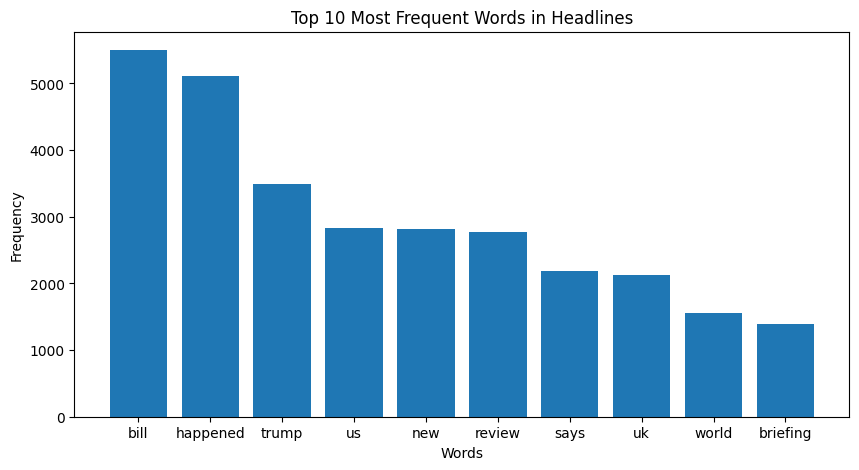

In [18]:
import re
from collections import Counter
from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))

def tokenize(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)  # use regex to extract words
    words = [w for w in words if w not in stop_words]
    return words

all_words = []
for headline in all_data['headline']:
    all_words.extend(tokenize(headline))

word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

plt.figure(figsize=(10, 5))
plt.bar([w[0] for w in top_words], [w[1] for w in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Headlines')
plt.show()


<ipython-input-40-8d57066f282f>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  all_data['month_year'] = all_data['date'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

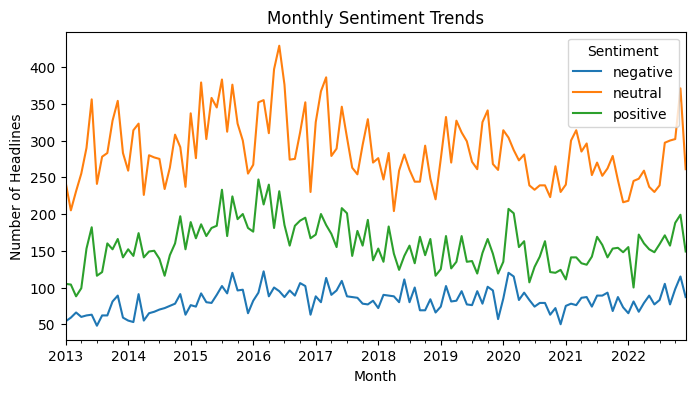

In [40]:
all_data['date'] = pd.to_datetime(all_data['publication_date'])
all_data['month_year'] = all_data['date'].dt.to_period('M')

monthly_senti = all_data.groupby(['month_year', 'Sentiment']).size().unstack()

plt.figure(figsize=(12, 6))
monthly_senti.plot(kind='line', figsize=(8, 4))
plt.title('Monthly Sentiment Trends')
plt.xlabel('Month')
plt.ylabel('Number of Headlines')
plt.show()

In [14]:
all_data["Sentiment"].value_counts()

Sentiment
Neutral     34359
Positive    19010
Negative     9866
Name: count, dtype: int64

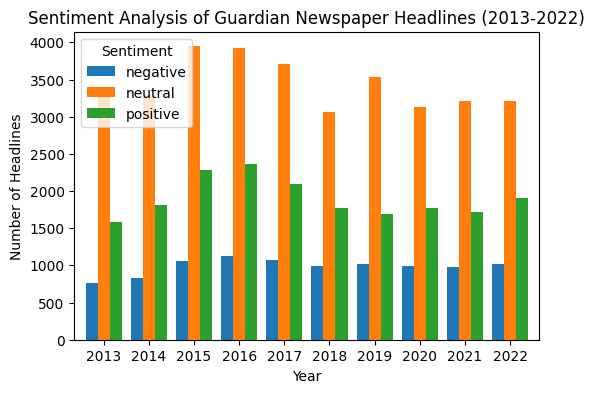

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Apply sentiment analysis on the headlines
all_data['Sentiment'] = all_data['headline'].apply(analyze_sentiment)

# Convert publication_date to datetime object and extract year
all_data['publication_date'] = pd.to_datetime(all_data['publication_date'])
all_data['year'] = all_data['publication_date'].dt.year

# Group by year and sentiment
sentiment_by_year = all_data.groupby(['year', 'Sentiment']).size().unstack(fill_value=0)

# Plot the results
sentiment_by_year.plot(kind='bar', figsize=(6, 4), width=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Analysis of Guardian Newspaper Headlines (2013-2022)')
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=0)
plt.show()


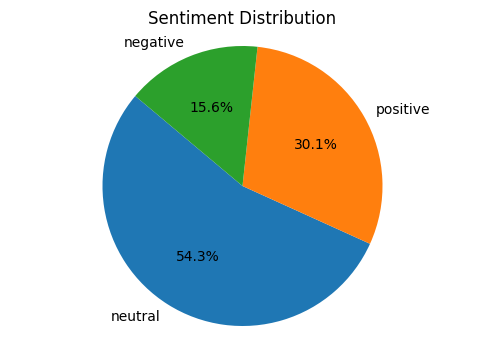

In [37]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = all_data['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()


## Using Neural Networks



#### Simple Artificial Neural Network

In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Tokenize text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(all_data['headline'])
sequences = tokenizer.texts_to_sequences(all_data['headline'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=20)

# Convert labels to one-hot encoding
encoder = LabelEncoder()
labels = encoder.fit_transform(all_data['Sentiment'])
labels = np.array(pd.get_dummies(labels))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=20),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Output layer: one neuron per class
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')


Epoch 1/10
1581/1581 [==============================] - 7s 4ms/step - loss: 0.7292 - accuracy: 0.6977 - val_loss: 0.4513 - val_accuracy: 0.8497
Epoch 2/10
1581/1581 [==============================] - 7s 4ms/step - loss: 0.3542 - accuracy: 0.8920 - val_loss: 0.3647 - val_accuracy: 0.8915
Epoch 3/10
1581/1581 [==============================] - 6s 4ms/step - loss: 0.2933 - accuracy: 0.9106 - val_loss: 0.3624 - val_accuracy: 0.8948
Epoch 4/10
1581/1581 [==============================] - 7s 4ms/step - loss: 0.2718 - accuracy: 0.9166 - val_loss: 0.3678 - val_accuracy: 0.8930
Epoch 5/10
1581/1581 [==============================] - 6s 4ms/step - loss: 0.2595 - accuracy: 0.9193 - val_loss: 0.3740 - val_accuracy: 0.8921
Epoch 6/10
1581/1581 [==============================] - 8s 5ms/step - loss: 0.2515 - accuracy: 0.9215 - val_loss: 0.3791 - val_accuracy: 0.8865
Epoch 7/10
1581/1581 [==============================] - 6s 4ms/step - loss: 0.2442 - accuracy: 0.9235 - val_loss: 0.3866 - val_accuracy:

### Using LSTM

In [25]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocess and tokenize text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(all_data['headline'])
sequences = tokenizer.texts_to_sequences(all_data['headline'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=20)

# Convert labels to one-hot encoding
encoder = LabelEncoder()
labels = encoder.fit_transform(all_data['Sentiment'])
labels = np.array(pd.get_dummies(labels))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=20),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(24, activation='relu'),
    Dense(3, activation='softmax')  # Output layer: one neuron per class
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')


Epoch 1/10
1581/1581 [==============================] - 51s 29ms/step - loss: 0.5327 - accuracy: 0.8103 - val_loss: 0.3741 - val_accuracy: 0.8915
Epoch 2/10
1581/1581 [==============================] - 42s 27ms/step - loss: 0.3596 - accuracy: 0.8951 - val_loss: 0.3641 - val_accuracy: 0.8956
Epoch 3/10
1581/1581 [==============================] - 47s 30ms/step - loss: 0.3360 - accuracy: 0.8984 - val_loss: 0.3514 - val_accuracy: 0.8981
Epoch 4/10
1581/1581 [==============================] - 43s 27ms/step - loss: 0.3117 - accuracy: 0.9025 - val_loss: 0.3590 - val_accuracy: 0.8989
Epoch 5/10
1581/1581 [==============================] - 42s 26ms/step - loss: 0.2911 - accuracy: 0.9068 - val_loss: 0.3691 - val_accuracy: 0.9011
Epoch 6/10
1581/1581 [==============================] - 51s 32ms/step - loss: 0.2681 - accuracy: 0.9115 - val_loss: 0.3690 - val_accuracy: 0.9017
Epoch 7/10
1581/1581 [==============================] - 39s 25ms/step - loss: 0.2443 - accuracy: 0.9186 - val_loss: 0.3764 -

396/396 [==============================] - 4s 10ms/step


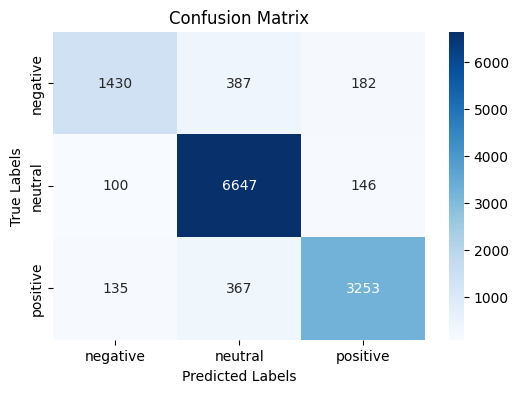

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [32]:
# Print training data
print("Training Data:")
print(X_train)

# Print training labels
print("\nTraining Labels:")
print(y_train)

# Print testing data
print("\nTesting Data:")
print(X_test)

# Print testing labels
print("\nTesting Labels:")
print(y_test)


Training Data:
[[ 257   87 2149 ...    0    0    0]
 [1803    4 4779 ...    0    0    0]
 [ 857   94  684 ...    0    0    0]
 ...
 [  98  118 1950 ...    0    0    0]
 [  17    1  435 ...    0    0    0]
 [ 623 2275   12 ...    0    0    0]]

Training Labels:
[[False  True False]
 [False  True False]
 [False  True False]
 ...
 [ True False False]
 [False  True False]
 [False False  True]]

Testing Data:
[[  65 2113   72 ...    0    0    0]
 [1224   87 2801 ...    0    0    0]
 [2924  613    1 ...    0    0    0]
 ...
 [ 270 4396    1 ...    0    0    0]
 [  20   35  506 ...    0    0    0]
 [ 950    1  906 ...    0    0    0]]

Testing Labels:
[[ True False False]
 [False  True False]
 [ True False False]
 ...
 [ True False False]
 [False  True False]
 [False  True False]]
